# Willkommen zur Einführung in Medizinische Bildverarbeitung
Prof. Dr. Thomas Schrader

Technische Hochschule Brandenburg

## Was wollen wir in diesem Workshop machen?
Rausfinden, 
- was digitale Bilder sind: Wie werden digitale Bilder im Computer dargestellt und verarbeitet?
- medizinische Bilder so besonders macht (in mehrfacher Hinsicht)
- wie wir Bilder in der Qualität verändern können (heller, dunkler, Kontrast)
- wie wir in medizinischen Bildern interessante Regionen markieren und vermessen können

## Was wir für die Arbeit brauchen
Python ist eine OpenSource Programmiersprache. Mit Google Colab ist es möglich, Python online auszuführen. Dazu wird eine beliebte Programmierumgebung verwendet: Jupyter-Notebook. 

Jupyter-Notebook vereint
- Dokumentation
- Quellcode und 
- Darstellung der Ergebnisse 
in einem Dokument. Es kann problemlos ausgetauscht und ausgedruckt werden

Mit Python arbeiten zig Tausend Entwickler:innen. Sie haben Bibliotheken zur Verfügung gestellt, die es erlauben, komplizierte Operationen mit einer Zeile Quellcode auszuführen, weil sie die Funktionen dafür geschrieben haben. Für Python ist das sehr gut und manchmal auch etwas komplizert: Für die Bildverarbeitung gibt es viele verschiedene Bibliotheken, die alles etwas unterschiedlich angesprochen werden und auch die Bilder intern etwas unterschiedlich zwischenspeichern. 

Wir arbeiten hier mit unter anderem mit der wohl bekanntesten Bibliothek für Computer Vision und Bildverarbeitung: OpenCV.

Wir brauchen allerdings auch eine Bibliothek, die medizinische Bilder öffnen kann: pydicom

Zum Darstellen von Bildern und Diagrammen gibt es die sehr häufig verwendete Bibliothek matplotlib.


Diese Bibliotheken müssen in den Arbeitsspeicher geladen werden.

## Laden der notwendigen Bibliotheken


In [41]:
import os
import cv2
import numpy as np
! pip install pydicom
import pydicom as dc
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Die Beispielbilder liegen in einem separaten Verzeichnis

In [42]:
fDir ="/content/drive/MyDrive/Colab Notebooks/MedDIP.Starter/images/"

## Laden eines 'normalen' Bildes
... wie es sonst aus jedem Fotoapparat kommt

In [43]:
fName = "1.3.6.1.4.1.9590.100.1.2.111673900911394832129091490821952505416.tif"
img = cv2.imread(fDir+fName)

In [44]:
img[1:3,1:3,1]

array([[104, 102],
       [ 96,  94]], dtype=uint8)

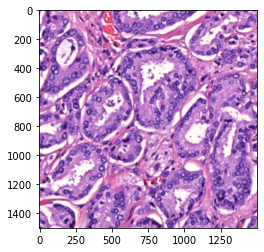

In [45]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(img)

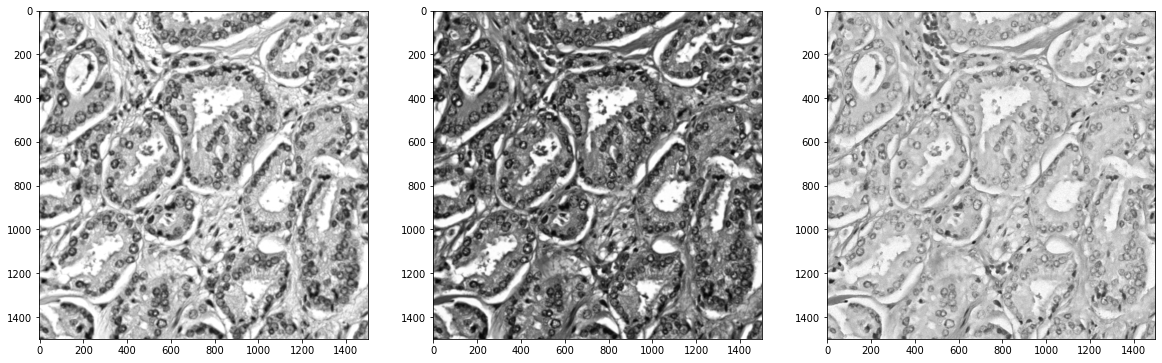

In [46]:
r, g, b = cv2.split(img)
plt.figure(figsize=[20,10])
plt.subplot(131)
plt.imshow(r,'gray')
plt.subplot(132)
plt.imshow(g,'gray')
plt.subplot(133)
plt.imshow(b,'gray')

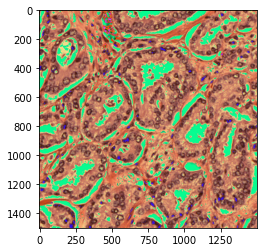

In [47]:
imgN = cv2.merge([r+10,g,b-100])
plt.imshow(imgN)

In [48]:
print(imgN.shape)

(1500, 1500, 3)


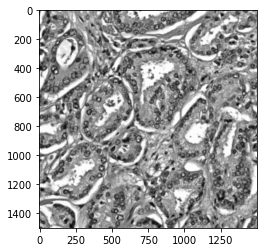

In [49]:
imgG = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(imgG,'gray')

## Eigenschaften des Bildes: Verteilung der Grauwerte (bzw. RGB-Werte)
Die Verteilung der Grauwerte (bzw. ggf. der Farbwerte) sind interessant, weil sie wichtige Informationen über die Helligkeit und den Kontrast liefern. 

Text(0.5, 0, 'Grauwert')

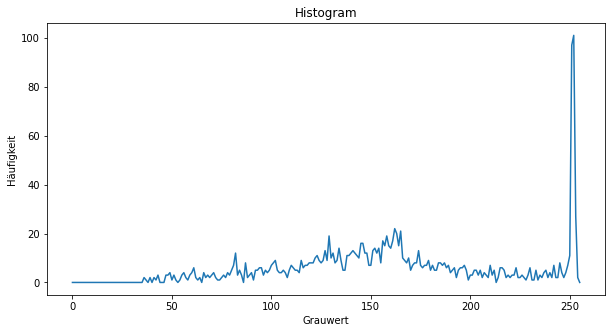

In [50]:
gHist = cv2.calcHist(imgG, [0], None, [256],[0,256])
plt.figure(figsize = [10,5])
plt.plot(gHist)
plt.title('Histogram')
plt.ylabel('Häufigkeit')
plt.xlabel('Grauwert')

In [51]:
rHist = cv2.calcHist(img, [0], None, [256],[0,256])
gHist = cv2.calcHist(img, [1], None, [256],[0,256])
bHist = cv2.calcHist(img, [2], None, [256],[0,256])

Text(0.5, 0, 'Grauwert')

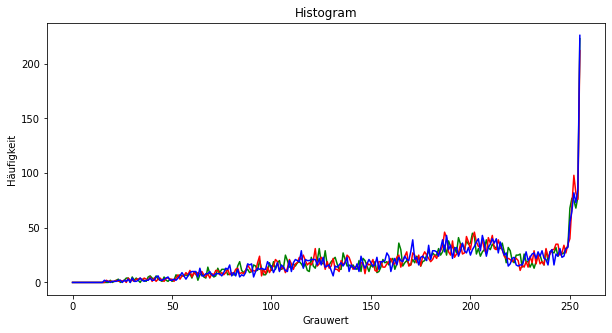

In [52]:
plt.figure(figsize = [10,5])
plt.plot(rHist,'g')
plt.plot(gHist,'r')
plt.plot(bHist,'b')
plt.title('Histogram')
plt.ylabel('Häufigkeit')
plt.xlabel('Grauwert')

# DICOM 
## Was ist DICOM
DICOM heisst ausgesprochen: Digital Imaging and Communications in Medicine und ist DER Standard für alle Medien, die im medizinischen Kontext verwendet werden. 
Begonnen hat der Standard natürlich mit Bildern, mit CT-Bildern, das waren die ersten digitalen Bilder in der Radiologie, die systematisch erzeugt wurden. Dann kam weiteres hinzu Ultraschall, normales Röntgen, MRT etc. 
Was ist so besonders: 
- Alle Bilder werden mit wichtigen Zusatzinformationen versehen - den Metadaten
- Auch wie die Bilder gespeichert werden, wie aufgerufen und wie sie erzeugt werden, ist alles im Standard geregelt

In [53]:
fName = 'brain_009.dcm'
print(fDir)
fileList  = os.listdir(fDir)
for item in fileList: 
  print(item) 

/content/drive/MyDrive/Colab Notebooks/MedDIP.Starter/images/
brain_009.dcm
1.3.12.2.1107.5.2.30.25049.30000007071110510826500012405.dcm
1.3.12.2.1107.5.2.30.25049.30000007071110510826500012401.dcm
CT.1.2.826.0.1.3680043.8.1091.142.0.119031369.69955598992_anon.dcm
DQN04_05.tif
image-000013.dcm
1.3.6.1.4.1.9590.100.1.2.111673900911394832129091490821952505416.tif
brain_010.dcm
act-f_b4f4726b-0d4e-41b4-8787-17cb9a1d383c_16Bit.tif
1.3.12.2.1107.5.2.30.25049.30000007071110510826500012297
.ipynb_checkpoints


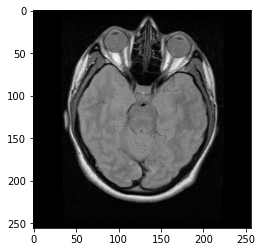

In [54]:
dcImg = dc.dcmread(fDir+fName)

plt.figure()
plt.imshow(dcImg.pixel_array, cmap = 'gray')

Jetzt schauen wir uns mal an, was das für Pixelwerte sind, denn die sind nämlich etwas anders.

(201,) (200,)


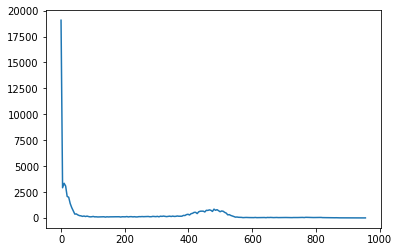

In [66]:
plt.figure()
bins = 200
hbins0, cl0 = np.histogram(dcImg.pixel_array, bins = bins)
print(cl0.shape, hbins0.shape)
plt.plot(cl0[0:len(cl0)-1], hbins0)



Eine Besonderheit: Hounsfield



In [56]:
dcImgHU = dcImg.pixel_array*dcImg.RescaleSlope + dcImg.RescaleIntercept

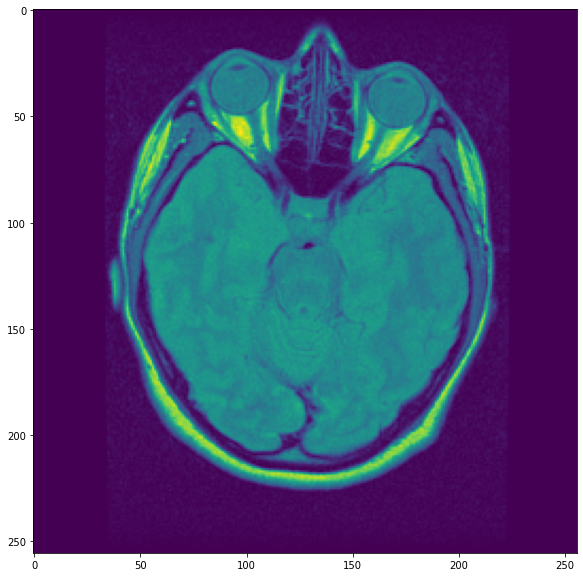

In [58]:
plt.figure(figsize=[10,10])
plt.imshow(dcImgHU)

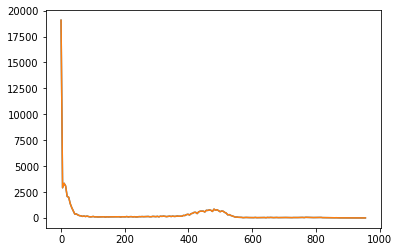

In [68]:
hbins1, cl1 = np.histogram(dcImgHU, bins = bins)
plt.figure()
plt.plot(cl1[0:len(cl1)-1],hbins1)
plt.plot(cl0[0:len(cl0)-1],hbins0)